### Training Results
The training results are saved in csv format in the 'Reward_Data' folder.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
path = 'Reward_Data'

In [3]:
# List all files in Reward_Data folder
files = sorted(os.listdir(path))
names = []

for f in files:
    name = f[(f.rfind('-')+1):-22]
    names.append(name)
    print('{}: {}'.format(name,f))

nyse_n_DDPG_lstm_window_11: run-nyse_n_DDPG_lstm_window_11_batch_norm-tag-nyse_n_DDPG_lstm_window_11_batch_norm_Reward.csv
nyse_n_DDPG_lstm_window_14: run-nyse_n_DDPG_lstm_window_14_batch_norm-tag-nyse_n_DDPG_lstm_window_14_batch_norm_Reward.csv
nyse_n_DDPG_lstm_window_3: run-nyse_n_DDPG_lstm_window_3_batch_norm-tag-nyse_n_DDPG_lstm_window_3_batch_norm_Reward.csv
nyse_n_DDPG_lstm_window_7: run-nyse_n_DDPG_lstm_window_7_batch_norm-tag-nyse_n_DDPG_lstm_window_7_batch_norm_Reward.csv
nyse_n_TD3_lstm_window_11: run-nyse_n_TD3_lstm_window_11_batch_norm-tag-nyse_n_TD3_lstm_window_11_batch_norm_Reward.csv
nyse_n_TD3_lstm_window_14: run-nyse_n_TD3_lstm_window_14_batch_norm-tag-nyse_n_TD3_lstm_window_14_batch_norm_Reward.csv
nyse_n_TD3_lstm_window_3: run-nyse_n_TD3_lstm_window_3_batch_norm-tag-nyse_n_TD3_lstm_window_3_batch_norm_Reward.csv
nyse_n_TD3_lstm_window_7: run-nyse_n_TD3_lstm_window_7_batch_norm-tag-nyse_n_TD3_lstm_window_7_batch_norm_Reward.csv


In [4]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [14]:
# Create a dictionary for each of these
d = {}
colours = []

for i in range(len(files)):
    # Generate random colour:
    rgb = np.random.rand(3,)
    colours.append(rgb)
    
    d[names[i]] = pd.read_csv('Reward_Data/{}'.format(files[i])).drop(['Wall time'], axis=1)
    #d[names[i]]['MA_10'] = movingaverage(d[names[i]]['Value'], 10)
    d[names[i]]['MA_25'] = d[names[i]]['Value'].rolling(window=25).mean()
    d[names[i]]['MA_10'] = d[names[i]]['Value'].rolling(window=10).mean()
    d[names[i]]['MA_5'] = d[names[i]]['Value'].rolling(window=5).mean()

In [15]:
d['nyse_n_DDPG_lstm_window_11'].head()

,Step,Value,MA_25,MA_10,MA_5
0,0,0.263030,NaN,NaN,NaN
1,1,0.475111,NaN,NaN,NaN
2,2,0.263170,NaN,NaN,NaN
3,3,0.014679,NaN,NaN,NaN
4,4,0.527215,NaN,NaN,0.308641


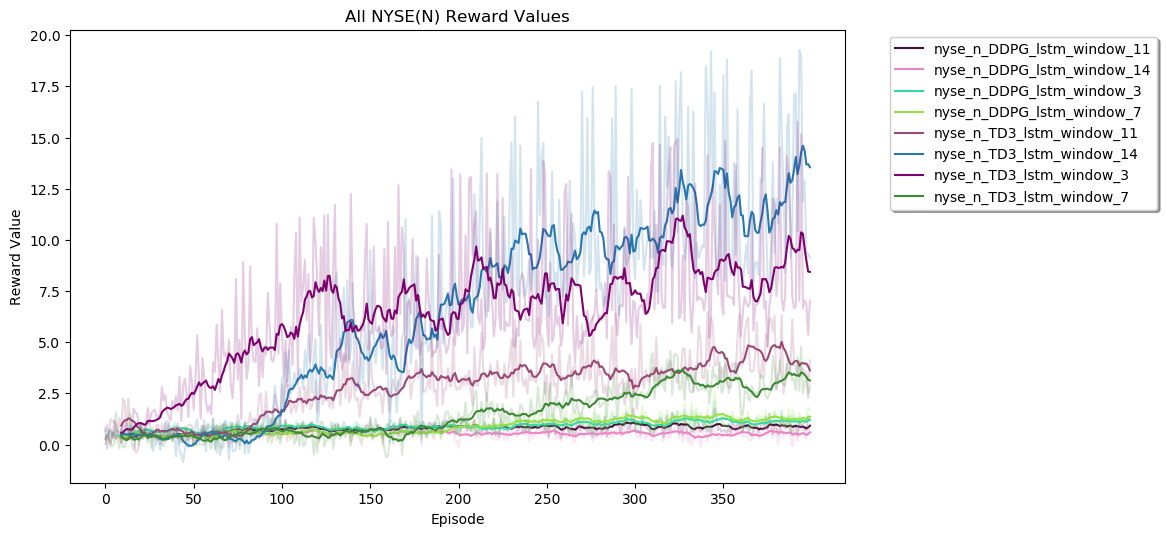

In [23]:
# Lets plot these that have to do with nyse_n
names_for_plot = []
for n in names:
    if 'nyse_n' in n:
        names_for_plot.append(n)
# Steps
steps = d[names_for_plot[0]]['Step']
# Plot
log_y = False
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Reward Values (LOG Y)')
    plt.ylabel('Reward Value (LOG Y)')
else:
    plt.title('All NYSE(N) Reward Values')
    plt.ylabel('Reward Value')
plt.xlabel('Episode')
for i in range(len(names_for_plot)):
    plt.plot(d[names_for_plot[i]]['Value'], c=colours[i], alpha=0.2)
    #plt.plot(d[names_for_plot[i]]['MA_5'], c=colours[i], alpha=0.4)
    plt.plot(d[names_for_plot[i]]['MA_10'], label='{}'.format(names_for_plot[i]), c=colours[i])
    #plt.plot(d[names_for_plot[i]]['MA_25'], c=colours[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(steps), 50))
plt.xticks()
plt.legend(loc='upper center', bbox_to_anchor=(1.23, 1), shadow=True, ncol=1)
plt.show()

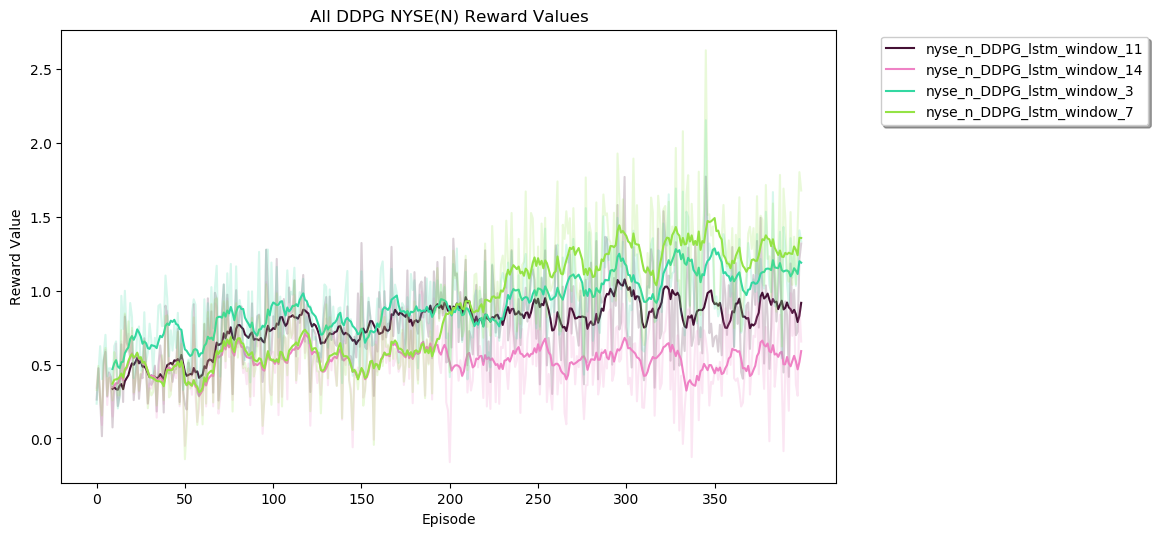

In [24]:
# Lets plot these that have to do with nyse_n
names_for_plot = []
for n in names:
    if 'DDPG' in n:
        names_for_plot.append(n)
# Steps
steps = d[names_for_plot[0]]['Step']
# Plot
log_y = False
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Reward Values (LOG Y)')
    plt.ylabel('Reward Value (LOG Y)')
else:
    plt.title('All DDPG NYSE(N) Reward Values')
    plt.ylabel('Reward Value')
plt.xlabel('Episode')
for i in range(len(names_for_plot)):
    plt.plot(d[names_for_plot[i]]['Value'], c=colours[i], alpha=0.2)
    #plt.plot(d[names_for_plot[i]]['MA_5'], c=colours[i], alpha=0.4)
    plt.plot(d[names_for_plot[i]]['MA_10'], label='{}'.format(names_for_plot[i]), c=colours[i])
    #plt.plot(d[names_for_plot[i]]['MA_25'], c=colours[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(steps), 50))
plt.xticks()
plt.legend(loc='upper center', bbox_to_anchor=(1.23, 1), shadow=True, ncol=1)
plt.show()

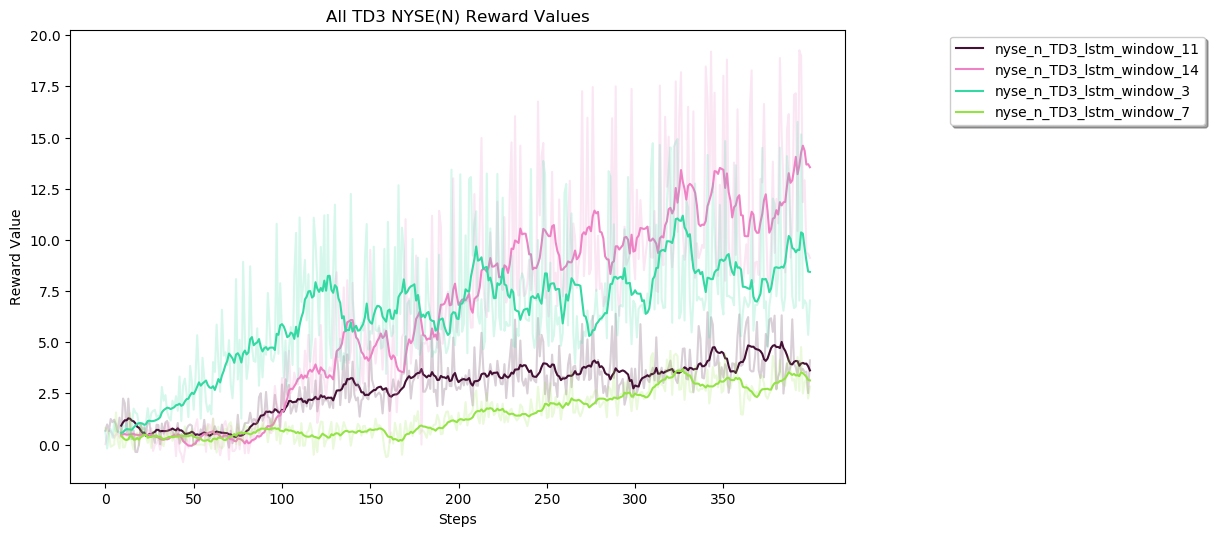

In [18]:
names_for_plot = []
for n in names:
    if 'TD3' in n:
        names_for_plot.append(n)
# Steps
steps = d[names_for_plot[0]]['Step']
# Plot
log_y = False
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Reward Values (LOG Y)')
    plt.ylabel('Reward Value (LOG Y)')
else:
    plt.title('All TD3 NYSE(N) Reward Values')
    plt.ylabel('Reward Value')
plt.xlabel('Steps')
for i in range(len(names_for_plot)):
    plt.plot(d[names_for_plot[i]]['Value'], c=colours[i], alpha=0.2)
    #plt.plot(d[names_for_plot[i]]['MA_5'], c=colours[i], alpha=0.4)
    plt.plot(d[names_for_plot[i]]['MA_10'], label='{}'.format(names_for_plot[i]), c=colours[i])
    #plt.plot(d[names_for_plot[i]]['MA_25'], c=colours[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(steps), 50))
plt.xticks()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## By Window

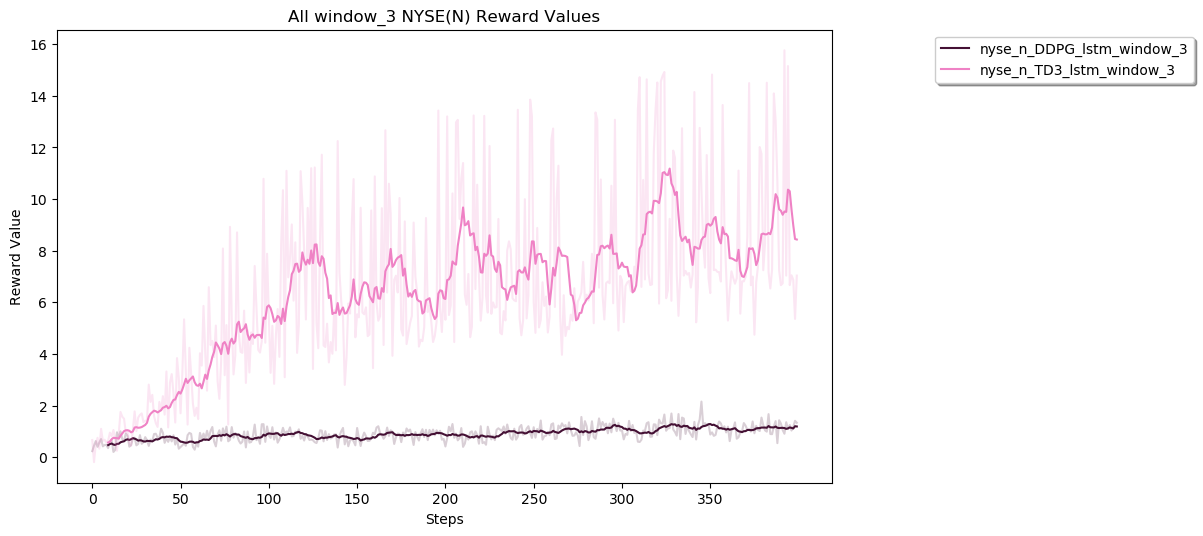

In [19]:
names_for_plot = []
for n in names:
    if 'window_3' in n:
        names_for_plot.append(n)
# Steps
steps = d[names_for_plot[0]]['Step']
# Plot
log_y = False
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Reward Values (LOG Y)')
    plt.ylabel('Reward Value (LOG Y)')
else:
    plt.title('All window_3 NYSE(N) Reward Values')
    plt.ylabel('Reward Value')
plt.xlabel('Steps')
for i in range(len(names_for_plot)):
    plt.plot(d[names_for_plot[i]]['Value'], c=colours[i], alpha=0.2)
    #plt.plot(d[names_for_plot[i]]['MA_5'], c=colours[i], alpha=0.4)
    plt.plot(d[names_for_plot[i]]['MA_10'], label='{}'.format(names_for_plot[i]), c=colours[i])
    #plt.plot(d[names_for_plot[i]]['MA_25'], c=colours[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(steps), 50))
plt.xticks()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

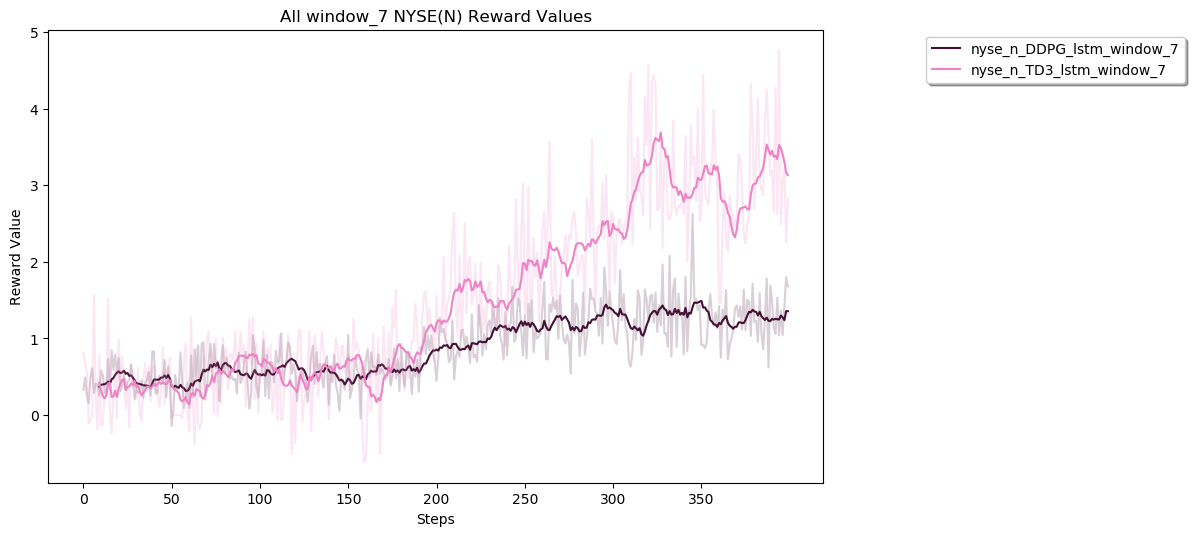

In [20]:
names_for_plot = []
for n in names:
    if 'window_7' in n:
        names_for_plot.append(n)
# Steps
steps = d[names_for_plot[0]]['Step']
# Plot
log_y = False
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Reward Values (LOG Y)')
    plt.ylabel('Reward Value (LOG Y)')
else:
    plt.title('All window_7 NYSE(N) Reward Values')
    plt.ylabel('Reward Value')
plt.xlabel('Steps')
for i in range(len(names_for_plot)):
    plt.plot(d[names_for_plot[i]]['Value'], c=colours[i], alpha=0.2)
    #plt.plot(d[names_for_plot[i]]['MA_5'], c=colours[i], alpha=0.4)
    plt.plot(d[names_for_plot[i]]['MA_10'], label='{}'.format(names_for_plot[i]), c=colours[i])
    #plt.plot(d[names_for_plot[i]]['MA_25'], c=colours[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(steps), 50))
plt.xticks()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

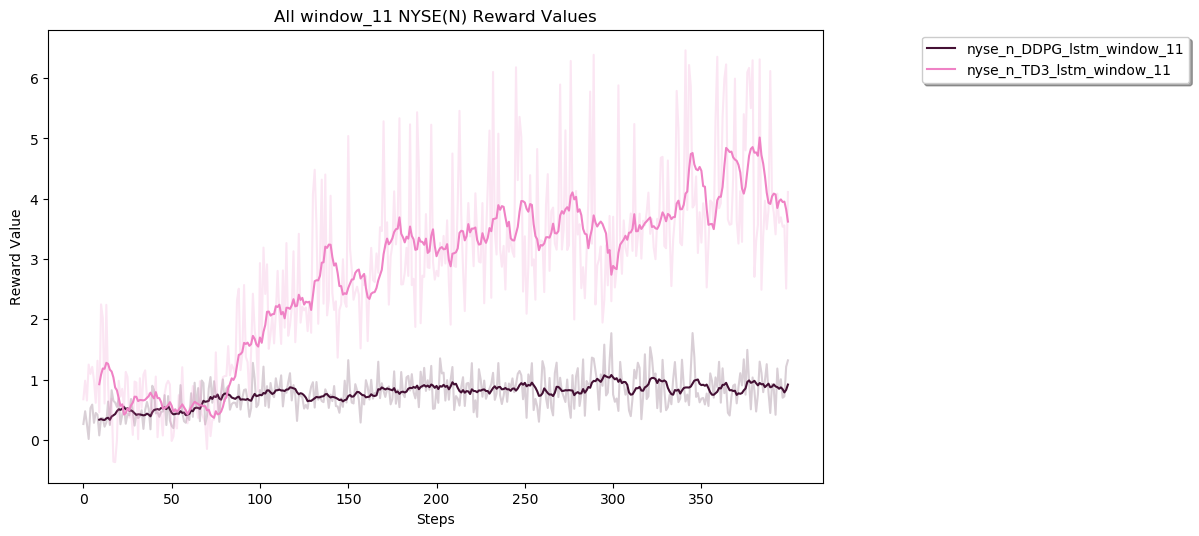

In [21]:
names_for_plot = []
for n in names:
    if 'window_11' in n:
        names_for_plot.append(n)
# Steps
steps = d[names_for_plot[0]]['Step']
# Plot
log_y = False
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Reward Values (LOG Y)')
    plt.ylabel('Reward Value (LOG Y)')
else:
    plt.title('All window_11 NYSE(N) Reward Values')
    plt.ylabel('Reward Value')
plt.xlabel('Steps')
for i in range(len(names_for_plot)):
    plt.plot(d[names_for_plot[i]]['Value'], c=colours[i], alpha=0.2)
    #plt.plot(d[names_for_plot[i]]['MA_5'], c=colours[i], alpha=0.4)
    plt.plot(d[names_for_plot[i]]['MA_10'], label='{}'.format(names_for_plot[i]), c=colours[i])
    #plt.plot(d[names_for_plot[i]]['MA_25'], c=colours[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(steps), 50))
plt.xticks()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

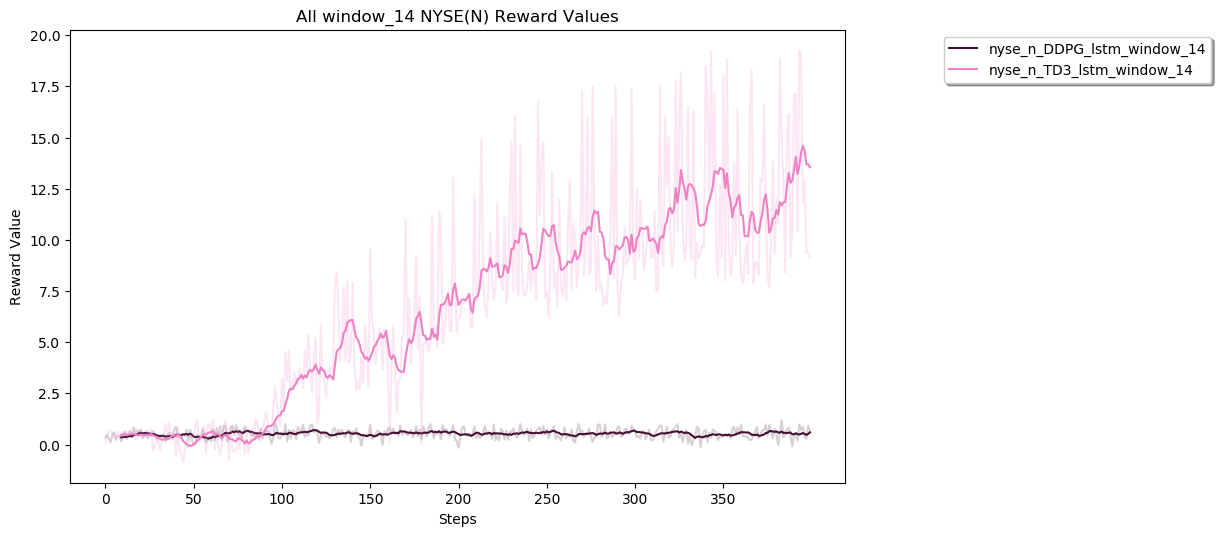

In [22]:
names_for_plot = []
for n in names:
    if 'window_14' in n:
        names_for_plot.append(n)
# Steps
steps = d[names_for_plot[0]]['Step']
# Plot
log_y = False
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Reward Values (LOG Y)')
    plt.ylabel('Reward Value (LOG Y)')
else:
    plt.title('All window_14 NYSE(N) Reward Values')
    plt.ylabel('Reward Value')
plt.xlabel('Steps')
for i in range(len(names_for_plot)):
    plt.plot(d[names_for_plot[i]]['Value'], c=colours[i], alpha=0.2)
    #plt.plot(d[names_for_plot[i]]['MA_5'], c=colours[i], alpha=0.4)
    plt.plot(d[names_for_plot[i]]['MA_10'], label='{}'.format(names_for_plot[i]), c=colours[i])
    #plt.plot(d[names_for_plot[i]]['MA_25'], c=colours[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(steps), 50))
plt.xticks()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

# Testing